## **Cafe Sales Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Importing Dataset
df = pd.read_csv("cafe_sales.csv")
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


## **Removing text data from int columns: -**

In [5]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

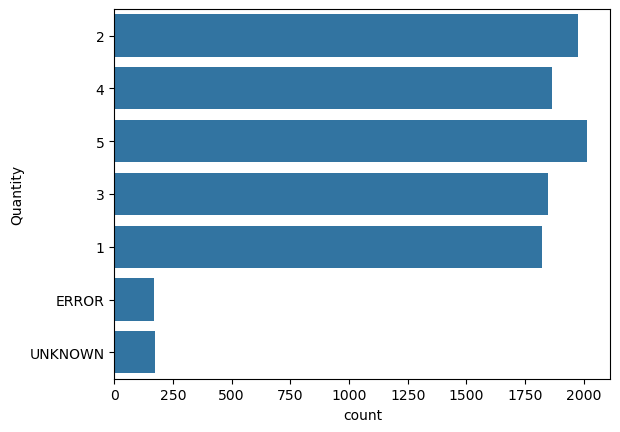

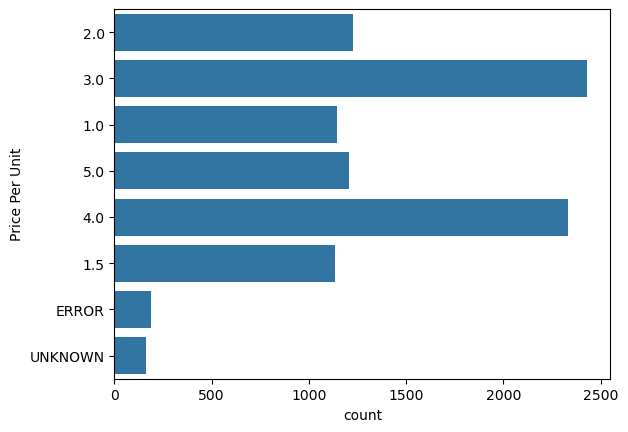

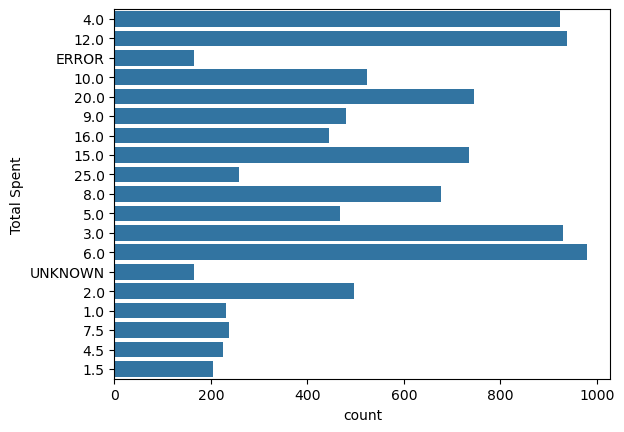

In [6]:
# Finding Values using Countplot
for col_name in df[['Quantity', 'Price Per Unit', 'Total Spent']]:
    sns.countplot(df[col_name])
    plt.show()

In [7]:
# Creating a function to remove error
def remove_errors(col_name):
    df[col_name] = df[col_name].replace("ERROR", np.nan).replace("UNKNOWN", np.nan)

In [8]:
# Removing Errors
for col_name in df[['Quantity', 'Price Per Unit', 'Total Spent']]:
    remove_errors(col_name)

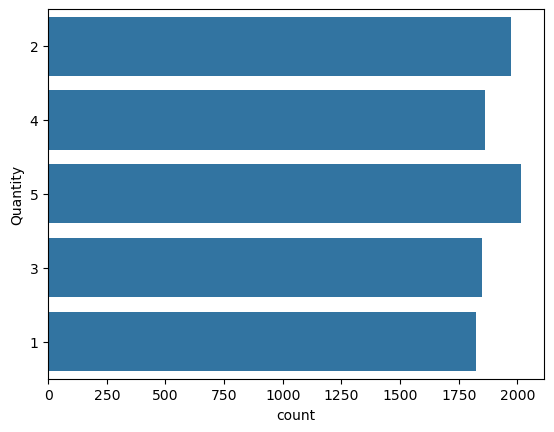

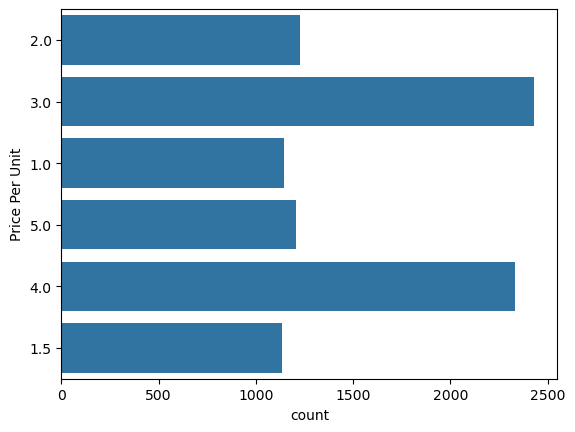

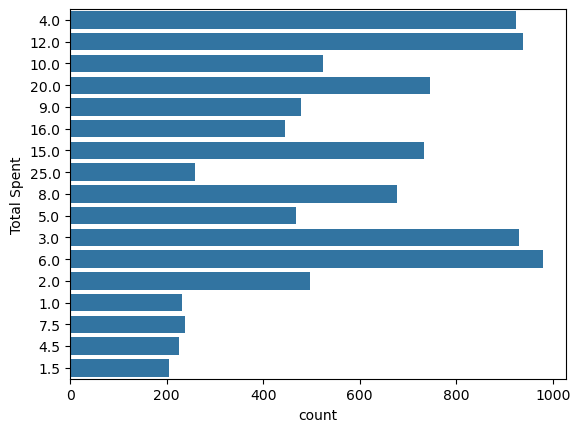

In [9]:
# Rechecking
for col_name in df[['Quantity', 'Price Per Unit', 'Total Spent']]:
    sns.countplot(df[col_name])
    plt.show()

In [10]:
# Replacing "ERROR" in Transaction Date column
df["Transaction Date"].value_counts()

Transaction Date
UNKNOWN       159
ERROR         142
2023-06-16     40
2023-02-06     40
2023-07-21     39
             ... 
2023-04-27     15
2023-09-24     15
2023-07-22     14
2023-03-11     14
2023-02-17     14
Name: count, Length: 367, dtype: int64

In [11]:
remove_errors('Transaction Date')

In [12]:
df["Item"].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

In [13]:
# Removing "ERROR" from Item column
remove_errors("Item")

In [14]:
df["Item"].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
Name: count, dtype: int64

## **Converting data types: -**

In [15]:
for col_name in df[["Price Per Unit", "Total Spent"]]:
    df[col_name] = df[col_name].astype(float)

In [16]:
df["Quantity"] = df["Quantity"].astype(float)

In [17]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


## **Checking dublicate values: -**

In [19]:
df.duplicated().sum()

0

There are no dublicate values in our dataset

## **Filling null values: -**

In [20]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


#### **Filling null values in Quantity: -**

In [21]:
# Finding median quantity of each item.
df.groupby("Item")["Quantity"].median()

Item
Cake        3.0
Coffee      3.0
Cookie      3.0
Juice       3.0
Salad       3.0
Sandwich    3.0
Smoothie    3.0
Tea         3.0
Name: Quantity, dtype: float64

In [22]:
df["Quantity"] = df["Quantity"].fillna(3.0)

In [23]:
df["Quantity"].isnull().sum()

0

#### **Filling null values in Price Per Unit: -**

In [24]:
df["Price Per Unit"].isnull().sum()

533

In [25]:
df.groupby("Item")["Price Per Unit"].value_counts()

Item      Price Per Unit
Cake      3.0               1085
Coffee    2.0               1108
Cookie    1.0               1026
Juice     3.0               1110
Salad     5.0               1082
Sandwich  4.0               1082
Smoothie  4.0               1036
Tea       1.5               1023
Name: count, dtype: int64

In [26]:
item_price = {}
for i in df["Item"].dropna().unique():
    print(i, df["Price Per Unit"][df["Item"]==i].iloc[0])
    item_price[i] = df["Price Per Unit"][df["Item"]==i].iloc[0]
item_price

Coffee 2.0
Cake 3.0
Cookie 1.0
Salad 5.0
Smoothie 4.0
Sandwich 4.0
Juice 3.0
Tea 1.5


{'Coffee': 2.0,
 'Cake': 3.0,
 'Cookie': 1.0,
 'Salad': 5.0,
 'Smoothie': 4.0,
 'Sandwich': 4.0,
 'Juice': 3.0,
 'Tea': 1.5}

In [27]:
for i in df[df["Price Per Unit"].isnull()].index:
    try:
        price = item_price[df["Item"][i]]
        df["Price Per Unit"][i] = price
    except KeyError:
        pass

In [28]:
df.isnull().sum()

Transaction ID         0
Item                 969
Quantity               0
Price Per Unit        54
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date     460
dtype: int64

#### **Filling null values in Total Spent: -**

In [29]:
df["Total Spent"] = df["Quantity"] * df["Price Per Unit"]

In [30]:
df.isnull().sum()

Transaction ID         0
Item                 969
Quantity               0
Price Per Unit        54
Total Spent           54
Payment Method      2579
Location            3265
Transaction Date     460
dtype: int64

#### **Filling null values in Item: -**

In [31]:
item_name = {}
for i,j in item_price.items():
    item_name[j] = i
item_name

{2.0: 'Coffee',
 3.0: 'Juice',
 1.0: 'Cookie',
 5.0: 'Salad',
 4.0: 'Sandwich',
 1.5: 'Tea'}

In [32]:
for i in df[df["Item"].isnull()].index:
    try:
        name = item_name[df["Price Per Unit"][i]]
        df["Item"][i] = name
    except KeyError:
        pass

In [33]:
df.isnull().sum()

Transaction ID         0
Item                  54
Quantity               0
Price Per Unit        54
Total Spent           54
Payment Method      2579
Location            3265
Transaction Date     460
dtype: int64

#### **Dropping null values: -**

In [34]:
df = df.dropna(subset = ["Item"])

In [35]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2562
Location            3242
Transaction Date     457
dtype: int64

In [36]:
df_copy = df.copy()

#### **Filling null values in Location: -**

In [37]:
df['Location'].value_counts()

Location
Takeaway    3008
In-store    3002
ERROR        357
UNKNOWN      337
Name: count, dtype: int64

In [38]:
df.loc[df["Location"] == "ERROR", "Location"] = "UNKNOWN"

In [39]:
df['Location'].value_counts()

Location
Takeaway    3008
In-store    3002
UNKNOWN      694
Name: count, dtype: int64

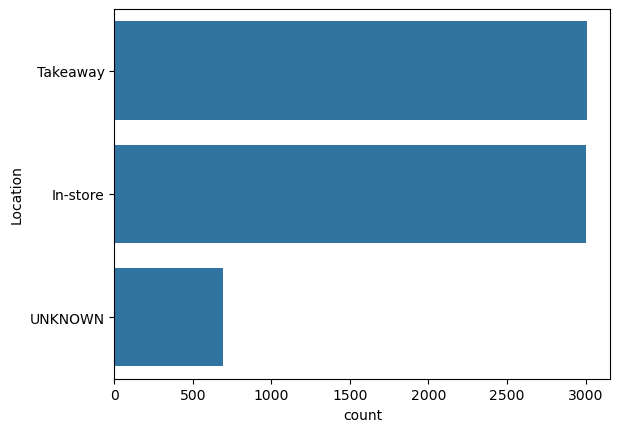

In [40]:
sns.countplot(data = df["Location"])
plt.show()

In [41]:
df["Location"].fillna(value = "Takeaway", limit = 1621, inplace = True)

In [42]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2562
Location            1621
Transaction Date     457
dtype: int64

In [43]:
df["Location"].fillna(value = "In-store", limit = 1621, inplace = True)

In [44]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2562
Location               0
Transaction Date     457
dtype: int64

In [45]:
df["Location"].value_counts()

Location
Takeaway    4629
In-store    4623
UNKNOWN      694
Name: count, dtype: int64

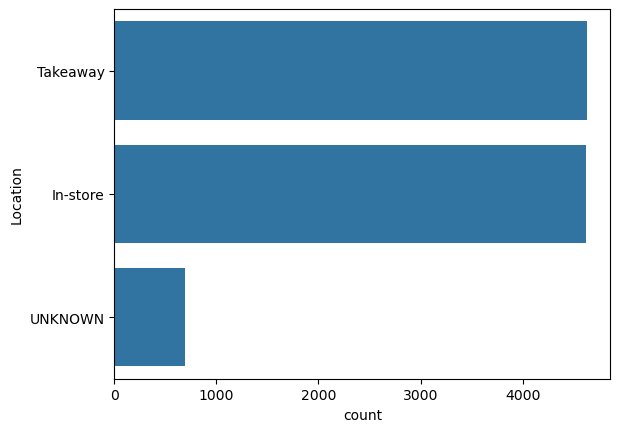

In [46]:
sns.countplot(data = df["Location"])
plt.show()

#### **Filling null values in Payment Method: -**

In [47]:
df["Payment Method"].value_counts()

Payment Method
Digital Wallet    2283
Credit Card       2256
Cash              2250
ERROR              303
UNKNOWN            292
Name: count, dtype: int64

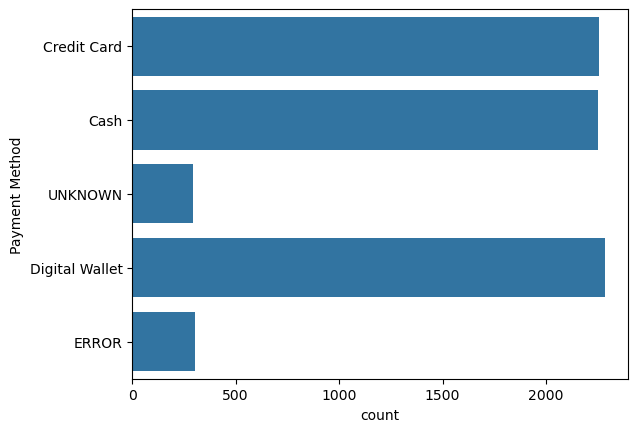

In [48]:
sns.countplot(data = df["Payment Method"])
plt.show()

In [49]:
df.loc[df["Payment Method"] == "ERROR", "Payment Method"] = "UNKNOWN"

In [50]:
df["Payment Method"].value_counts()

Payment Method
Digital Wallet    2283
Credit Card       2256
Cash              2250
UNKNOWN            595
Name: count, dtype: int64

In [51]:
df["Payment Method"].isnull().sum()

2562

In [52]:
df["Payment Method"].fillna(value = "Digital Wallet", limit = 854, inplace = True)

In [53]:
df["Payment Method"].fillna(value = "Credit Card", limit = 854, inplace = True)

In [54]:
df["Payment Method"].fillna(value = "Cash", limit = 854, inplace = True)

In [55]:
df["Payment Method"].value_counts()

Payment Method
Digital Wallet    3137
Credit Card       3110
Cash              3104
UNKNOWN            595
Name: count, dtype: int64

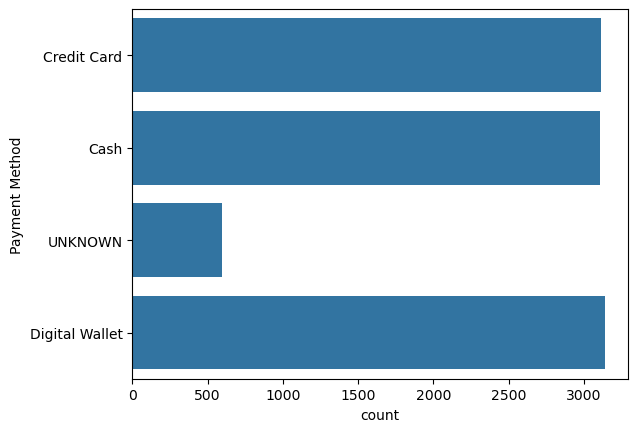

In [56]:
sns.countplot(data = df["Payment Method"])
plt.show()

In [57]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    457
dtype: int64

#### **Handling null values in Transaction Date: -**

In [58]:
df["Transaction Date"].value_counts()

Transaction Date
2023-06-16    40
2023-07-21    39
2023-02-06    39
2023-07-24    39
2023-03-13    39
              ..
2023-04-27    15
2023-11-24    15
2023-03-11    14
2023-02-17    14
2023-07-22    13
Name: count, Length: 365, dtype: int64

In [59]:
remove_errors("Transaction Date")

In [60]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    457
dtype: int64

In [61]:
df = df.dropna(subset = "Transaction Date", axis = 0)

In [62]:
df.shape

(9489, 8)

In [63]:
df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [64]:
df.dropna(inplace = True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9489 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9489 non-null   object        
 1   Item              9489 non-null   object        
 2   Quantity          9489 non-null   float64       
 3   Price Per Unit    9489 non-null   float64       
 4   Total Spent       9489 non-null   float64       
 5   Payment Method    9489 non-null   object        
 6   Location          9489 non-null   object        
 7   Transaction Date  9489 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 667.2+ KB


## **Converting Dtype**

In [66]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])

In [67]:
df["Quantity"] = df["Quantity"].astype("int")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9489 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9489 non-null   object        
 1   Item              9489 non-null   object        
 2   Quantity          9489 non-null   int32         
 3   Price Per Unit    9489 non-null   float64       
 4   Total Spent       9489 non-null   float64       
 5   Payment Method    9489 non-null   object        
 6   Location          9489 non-null   object        
 7   Transaction Date  9489 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 630.1+ KB


## **Different approch to handle null values: -**

In [69]:
df_copy.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2562
Location            3242
Transaction Date     457
dtype: int64

In [70]:
df_copy["Payment Method"].value_counts()

Payment Method
Digital Wallet    2283
Credit Card       2256
Cash              2250
ERROR              303
UNKNOWN            292
Name: count, dtype: int64

In [71]:
# Replacing ERROR values
df_copy["Payment Method"] = df_copy["Payment Method"].str.replace("ERROR", "UNKNOWN")
df_copy["Location"] = df_copy["Location"].str.replace("ERROR", "UNKNOWN")

In [72]:
# Filling null values.
df_copy["Payment Method"] = df_copy["Payment Method"].fillna("UNKNOWN")
df_copy["Location"] = df_copy["Location"].fillna("UNKNOWN")

In [73]:
df_copy.isnull().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    457
dtype: int64

In [74]:
df_copy = df_copy.dropna(subset = "Transaction Date", axis = 0)

In [75]:
df_copy.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

We build model using both pre-processing logic and check the accuracy of the model to decide which pre-processing was better.